In [1]:
# Author:Zhang Yuan
from MyPackage import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# ------------------------------------------------------------
__mypath__ = MyPath.MyClass_Path("")  # 路径类
mylogging = MyDefault.MyClass_Default_Logging(activate=False)  # 日志记录类，需要放在上面才行
myfile = MyFile.MyClass_File()  # 文件操作类
myword = MyFile.MyClass_Word()  # word生成类
myexcel = MyFile.MyClass_Excel()  # excel生成类
myini = MyFile.MyClass_INI()  # ini文件操作类
mytime = MyTime.MyClass_Time()  # 时间类
myparallel = MyTools.MyClass_ParallelCal()  # 并行运算类
myplt = MyPlot.MyClass_Plot()  # 直接绘图类(单个图窗)
mypltpro = MyPlot.MyClass_PlotPro()  # Plot高级图系列
myfig = MyPlot.MyClass_Figure(AddFigure=False)  # 对象式绘图类(可多个图窗)
myfigpro = MyPlot.MyClass_FigurePro(AddFigure=False)  # Figure高级图系列
mynp = MyArray.MyClass_NumPy()  # 多维数组类(整合Numpy)
mypd = MyArray.MyClass_Pandas()  # 矩阵数组类(整合Pandas)
mypdpro = MyArray.MyClass_PandasPro()  # 高级矩阵数组类
myDA = MyDataAnalysis.MyClass_DataAnalysis()  # 数据分析类
myDefault = MyDefault.MyClass_Default_Matplotlib()  # 画图恢复默认设置类
# myMql = MyMql.MyClass_MqlBackups() # Mql备份类
# myBaidu = MyWebCrawler.MyClass_BaiduPan() # Baidu网盘交互类
# myImage = MyImage.MyClass_ImageProcess()  # 图片处理类
myBT = MyBackTest.MyClass_BackTestEvent()  # 事件驱动型回测类
myBTV = MyBackTest.MyClass_BackTestVector()  # 向量型回测类
myML = MyMachineLearning.MyClass_MachineLearning()  # 机器学习综合类
mySQL = MyDataBase.MyClass_MySQL(connect=False)  # MySQL类
mySQLAPP = MyDataBase.MyClass_SQL_APPIntegration()  # 数据库应用整合
myWebQD = MyWebCrawler.MyClass_QuotesDownload(tushare=False)  # 金融行情下载类
myWebR = MyWebCrawler.MyClass_Requests()  # Requests爬虫类
myWebS = MyWebCrawler.MyClass_Selenium(openChrome=False)  # Selenium模拟浏览器类
myWebAPP = MyWebCrawler.MyClass_Web_APPIntegration()  # 爬虫整合应用类
myEmail = MyWebCrawler.MyClass_Email()  # 邮箱交互类
myReportA = MyQuant.MyClass_ReportAnalysis()  # 研报分析类
myFactorD = MyQuant.MyClass_Factor_Detection()  # 因子检测类
myKeras = MyDeepLearning.MyClass_tfKeras()  # tfKeras综合类
myTensor = MyDeepLearning.MyClass_TensorFlow()  # Tensorflow综合类
myMT5 = MyMql.MyClass_ConnectMT5(connect=False)  # Python链接MetaTrader5客户端类
myMT5Pro = MyMql.MyClass_ConnectMT5Pro(connect=False)  # Python链接MT5高级类
myMT5Indi = MyMql.MyClass_MT5Indicator()  # MT5指标Python版
myMT5Report = MyMT5Report.MyClass_StratTestReport(AddFigure=False)  # MT5策略报告类
myMT5Lots_Fix = MyMql.MyClass_Lots_FixedLever(connect=False)  # 固定杠杆仓位类
myMT5Lots_Dy = MyMql.MyClass_Lots_DyLever(connect=False)  # 浮动杠杆仓位类
myMT5run = MyMql.MyClass_RunningMT5()  # Python运行MT5
myMT5code = MyMql.MyClass_CodeMql5()  # Python生成MT5代码
myMoneyM = MyTrade.MyClass_MoneyManage()  # 资金管理类
# myDefault.set_backend_default("Pycharm")  # Pycharm下需要plt.show()才显示图
# ------------------------------------------------------------

In [2]:
# 弹出窗显示必须加上：%matplotlib auto
# 控制台显示必须加上：%matplotlib inline
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

''' 分析结论：
# Range自相关性分析的价值在于其曲线的交替变化反应出周期性。这周期性的影响体现在日度、周度上较为显著。
# Range自相关性的周期为D1。
# Range自相关性特征：
    ## D1时间框下各期都明显；
    ## H12时间框下在2、4、6等2的倍数时明显；
    ## H1时间框下在24、48等24的倍数时明显；
    ## 以上说明自相关性是以 日 为单位的。且在D1以下的时间框中，数据要滞后以日为单位的时间段才有明显的自相关性。
# Range自相关性的扩展：
    ## Range的乘数、平方、N期平均都能发现自相关性。
    ## 1期的ATR能发现自相关性。
    ## 以 Close-Open、Rate、LogRate 计算的自相关性不显著。
    ## 以上说明自相关性要考虑到极值。
# 数据切片的自相关性研究：
    ## 存在周期为W1的自相关性。
    ## 以日为跨度的自相关性显著。
# 主要品种的各品种都符合上述规律，汇率的Range自相关性是特有的。
'''


' 分析结论：\n# Range自相关性分析的价值在于其曲线的交替变化反应出周期性。这周期性的影响体现在日度、周度上较为显著。\n# Range自相关性的周期为D1。\n# Range自相关性特征：\n    ## D1时间框下各期都明显；\n    ## H12时间框下在2、4、6等2的倍数时明显；\n    ## H1时间框下在24、48等24的倍数时明显；\n    ## 以上说明自相关性是以 日 为单位的。且在D1以下的时间框中，数据要滞后以日为单位的时间段才有明显的自相关性。\n# Range自相关性的扩展：\n    ## Range的乘数、平方、N期平均都能发现自相关性。\n    ## 1期的ATR能发现自相关性。\n    ## 以 Close-Open、Rate、LogRate 计算的自相关性不显著。\n    ## 以上说明自相关性要考虑到极值。\n# 数据切片的自相关性研究：\n    ## 存在周期为W1的自相关性。\n    ## 以日为跨度的自相关性显著。\n# 主要品种的各品种都符合上述规律，汇率的Range自相关性是特有的。\n'

In [3]:
symbol_list = ['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD', 'USDJPY', 'USDCAD', 'USDCHF', 'XAUUSD',
               'XAGUSD']  # myMT5Pro.get_mainusd_symbol_name_list()
timeframe_list = ["TIMEFRAME_D1", "TIMEFRAME_H12", "TIMEFRAME_H8", "TIMEFRAME_H6",
                  "TIMEFRAME_H4", "TIMEFRAME_H3", "TIMEFRAME_H2", "TIMEFRAME_H1",
                  "TIMEFRAME_M30", "TIMEFRAME_M20", "TIMEFRAME_M15", "TIMEFRAME_M12",
                  "TIMEFRAME_M10", "TIMEFRAME_M6", "TIMEFRAME_M5", "TIMEFRAME_M4",
                  "TIMEFRAME_M3", "TIMEFRAME_M2", "TIMEFRAME_M1"]
symbol = "EURUSD"
timeframe = "TIMEFRAME_D1"
date_from, date_to = myMT5Pro.get_date_range(timeframe)
data_total = myMT5Pro.getsymboldata(symbol, timeframe, date_from, date_to, index_time=True, col_capitalize=True)


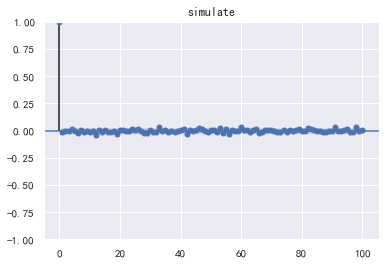

In [4]:
### 随机模拟汇率价格(收盘=下一期开盘)，测试自相关性
# (结论错误！)汇率的Range之所以有较强的自相关性，是因为其价格没有跳空，H-L有较大的重叠。所以汇率有自相关性仅仅是价格走势的结果。通过检测其他有跳空的品种，比如AUS200可以发现这一点。
# 汇率的Range自相关性是特有的。
simulate = pd.DataFrame(None, index=data_total.index, columns=["Open","High" , "Low" ,"Close"])
np.random.seed(123456)
lastclose = 0
for i,row in simulate.iterrows():
    row.Open = lastclose
    rnd = np.random.normal(0, 1, 3)
    rnd = np.floor(rnd*10000)
    row.High = row.Open + rnd.max()
    row.Low = row.Open + rnd.min()
    row.Close = row.Open + rnd[-1]
    lastclose = row.Close
simulate["Range"] = simulate["High"] - simulate["Low"]
myDA.tsa.tsa_acf(simulate["Range"], nlags=100, plot=True, plottitle="simulate")



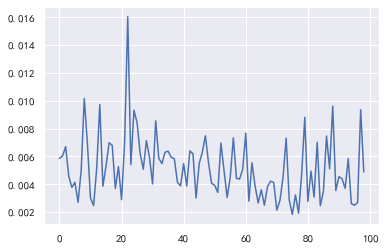

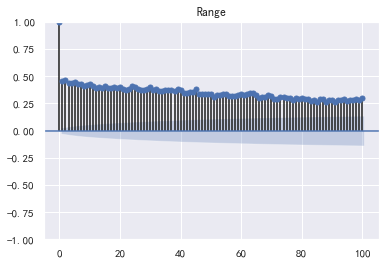

In [5]:
### 自相关性分析
# myDA.tsa_auto_test(data_vola)
# acf = myDA.tsa.tsa_acf(data_vola, nlags=100)
# myDA.tsa.plot_selfcorrelation(data_vola, count=100) # 1期波动与其滞后的相关系数曲线

# ---Range分析
data_vola = data_total["Range"]
# Range有交替性
plt.plot(data_vola[-100:-1].tolist())
plt.show()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Range")


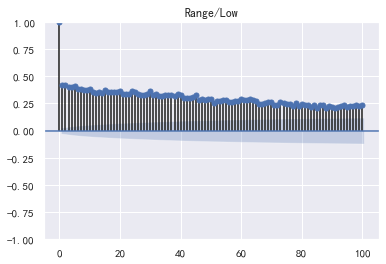

In [6]:
# ---Range增长率
data_vola = data_total["Range"]/data_total["Low"]
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Range/Low")

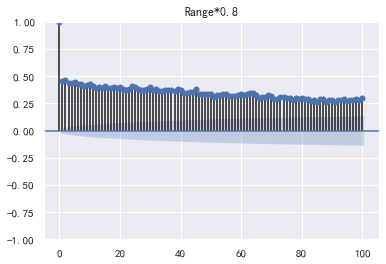

In [7]:
# ---Range乘数
data_vola = data_total["Range"]*0.8
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Range*0.8")

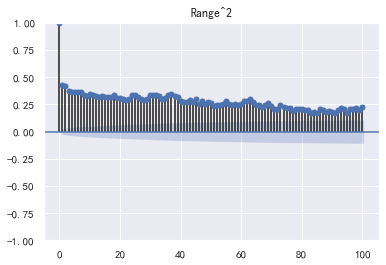

In [8]:
# ---Range^2
data_vola = data_total["Range^2"]
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Range^2")

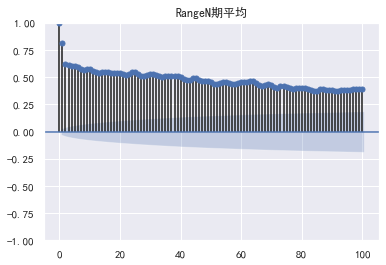

In [9]:
# ---RangeN期平均
averageN = 2
data_vola = data_total["Range"]
data_vola = data_vola.rolling(averageN).mean().dropna()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="RangeN期平均")

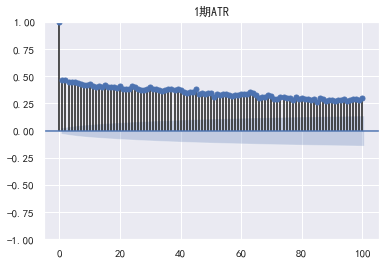

In [10]:
# ---1期ATR
atrperiod = 1
data_vola = myMT5Indi.ATR(data_total, InpAtrPeriod=atrperiod)[atrperiod:] # 除去首位的na
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="1期ATR")

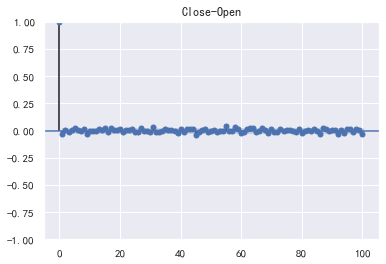

In [11]:
# ---Close-Open，不具备显著自相关性
data_vola = data_total["Close"] - data_total["Open"]
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Close-Open")

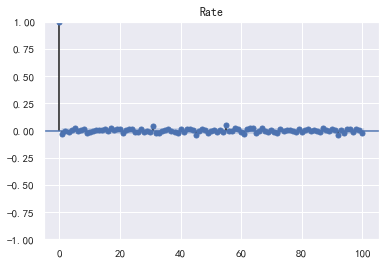

In [12]:
# ---Rate
data_vola = data_total["Rate"].dropna()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Rate")

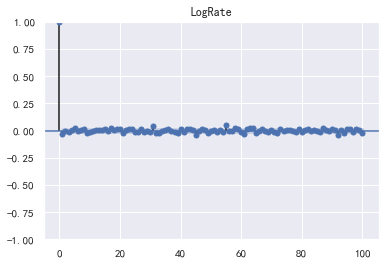

In [13]:
# ---LogRate
data_vola = data_total["LogRate"].dropna()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="LogRate")


In [4]:
### 数据切片的自相关性研究
symbol_list =['EURUSD','GBPUSD','AUDUSD','NZDUSD','USDJPY','USDCAD','USDCHF','XAUUSD','XAGUSD'] # myMT5Pro.get_mainusd_symbol_name_list()
timeframe_list = ["TIMEFRAME_D1","TIMEFRAME_H12","TIMEFRAME_H8","TIMEFRAME_H6",
                  "TIMEFRAME_H4","TIMEFRAME_H3","TIMEFRAME_H2","TIMEFRAME_H1",
                  "TIMEFRAME_M30","TIMEFRAME_M20","TIMEFRAME_M15","TIMEFRAME_M12",
                  "TIMEFRAME_M10","TIMEFRAME_M6","TIMEFRAME_M5","TIMEFRAME_M4",
                  "TIMEFRAME_M3","TIMEFRAME_M2","TIMEFRAME_M1"]
symbol = "EURUSD"
timeframe = "TIMEFRAME_H1"
date_from, date_to = myMT5Pro.get_date_range(timeframe)
data_total = myMT5Pro.getsymboldata(symbol, timeframe, date_from, date_to, index_time=True, col_capitalize=True)


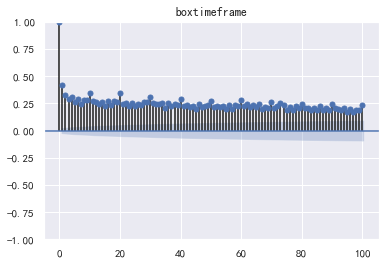

In [15]:
# ---以指定时间框的时间进行数据切片。以指定时间框的时间数据获取指定数量个数据，比如以日度时间框获取1H时间框前2个数据。# 此模式以起点对应的，不符合则跳过。比如日度时间2010.08.02 00:00:00，而1H时间是以 2010.08.02 01:00:00 开始，则跳过。
boxtimeframe = "TIMEFRAME_D1"
data_box = myMT5Pro.getsymboldata(symbol, boxtimeframe, date_from, date_to, index_time=True, col_capitalize=True)
data_choose = myMT5Pro.slice_by_tftime(data_total, data_box.index, 2)
data_vola = data_choose["Range"]
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="boxtimeframe")


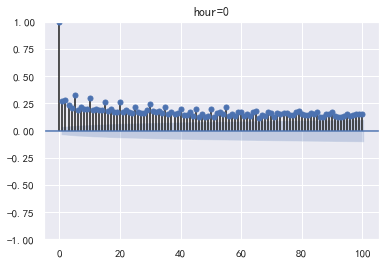

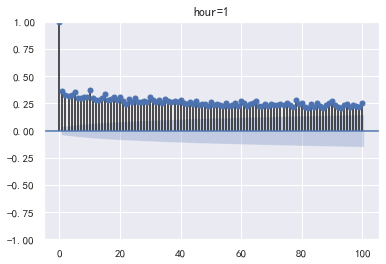

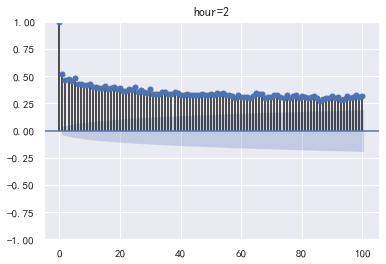

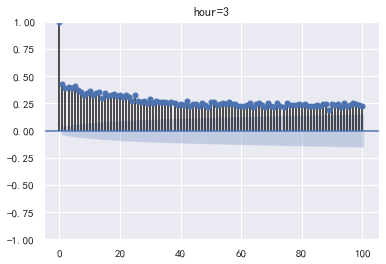

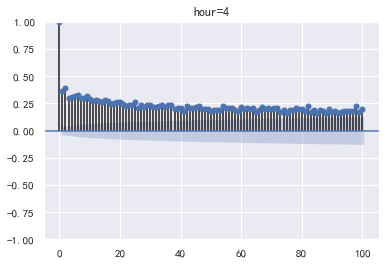

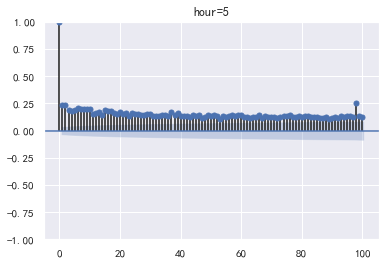

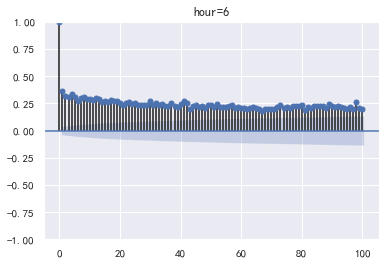

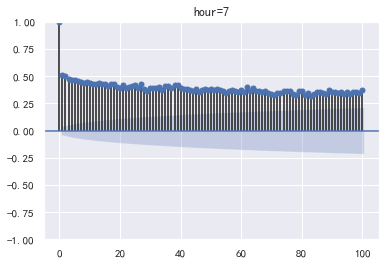

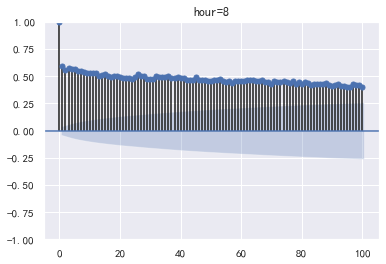

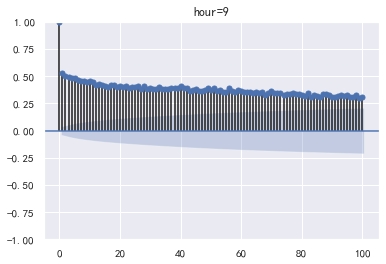

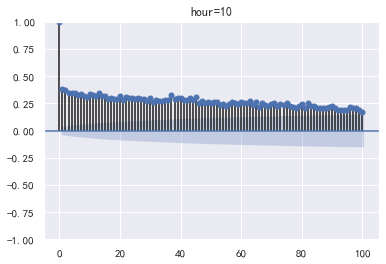

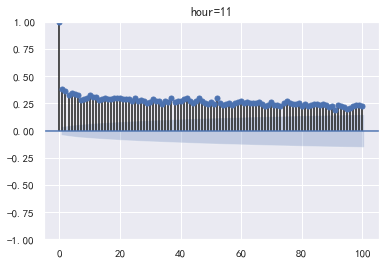

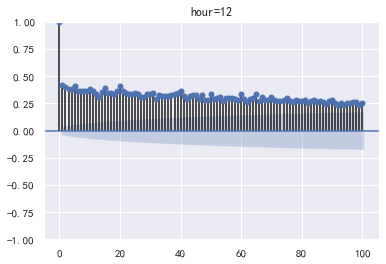

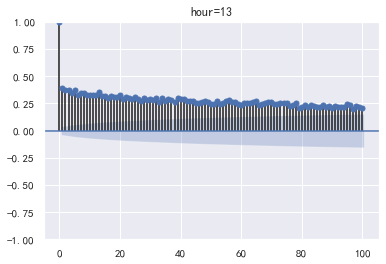

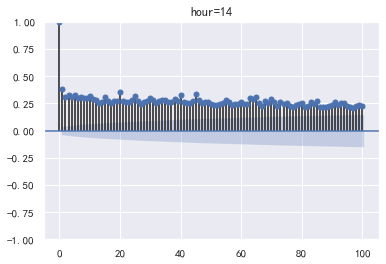

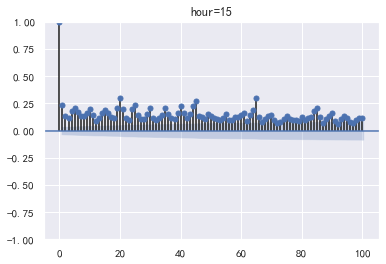

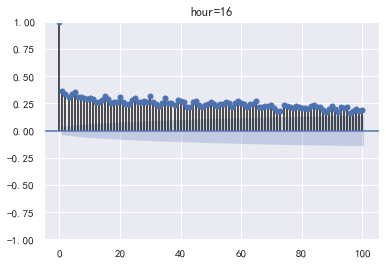

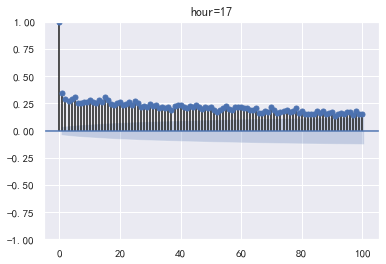

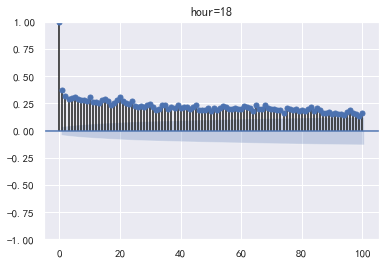

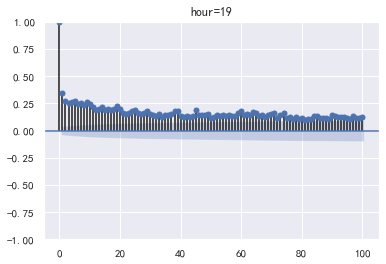

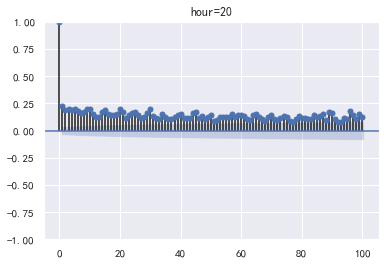

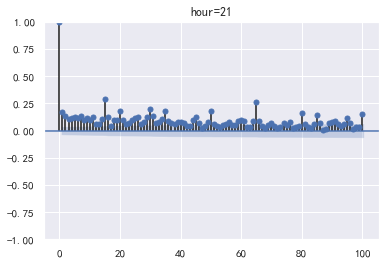

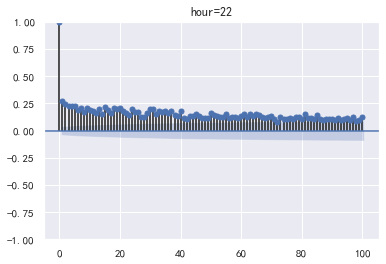

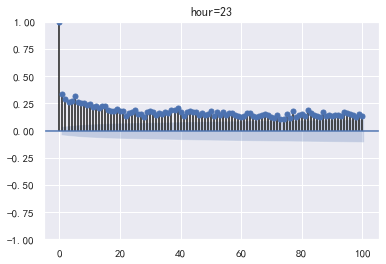

In [7]:
# ---以指定的时间词缀进行数据切片。# mode = "minute"/"hour"/"day"/"day_of_week"/"days_in_month"/"month"/"quarter"# limited 选择限制于里面的元素。
for limited_i in range(24):
    data_choose = myMT5Pro.slice_by_timeaffix(data_total, mode="hour", limited = [limited_i])
    data_vola = data_choose["Range"]
    myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="hour=%s"%limited_i)


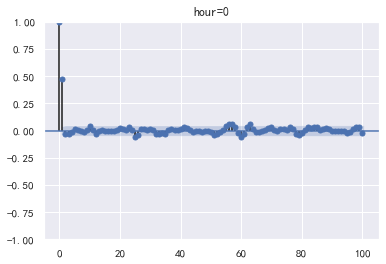

In [17]:
data_vola = data_choose["Close"].diff(2).dropna() # 因为数据有意义包含，分析不恰当！
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="hour=%s"%limited_i)

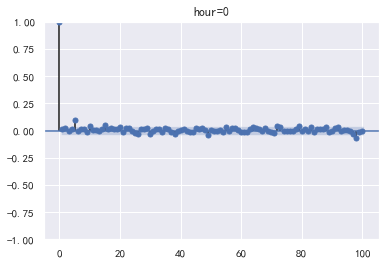

In [18]:
data_vola = data_choose["Rate"].dropna()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="hour=%s"%limited_i)

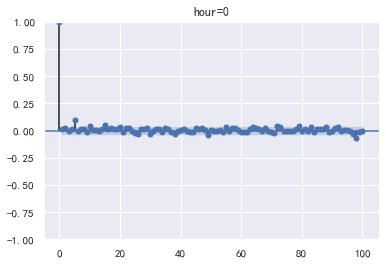

In [19]:
data_vola = data_choose["LogRate"].dropna()
myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="hour=%s"%limited_i)

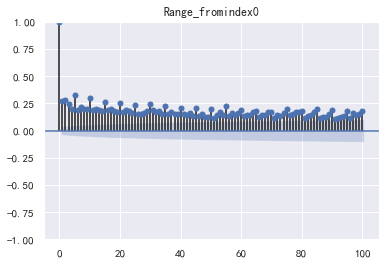

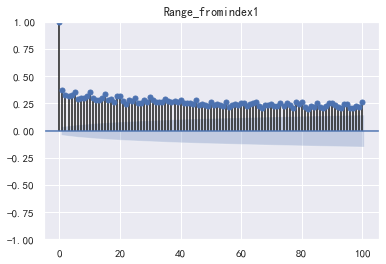

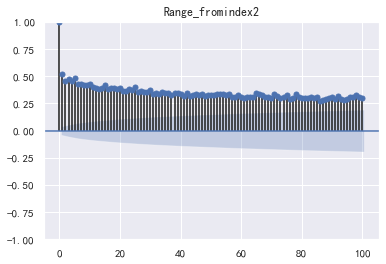

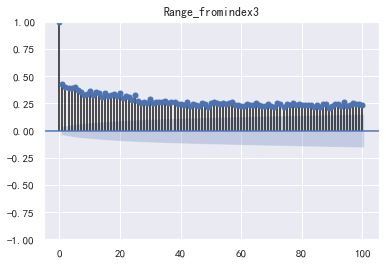

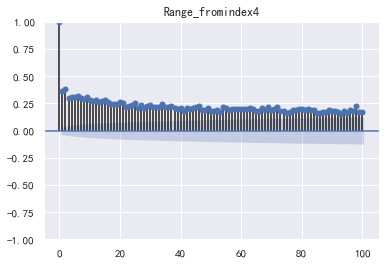

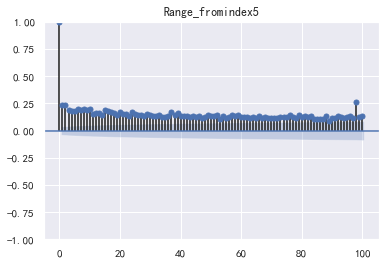

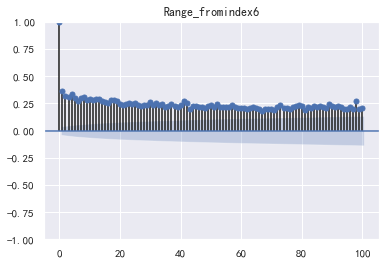

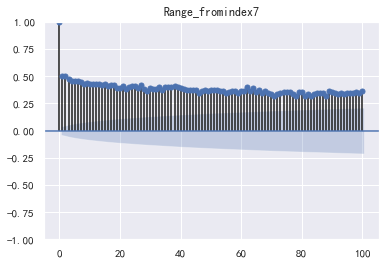

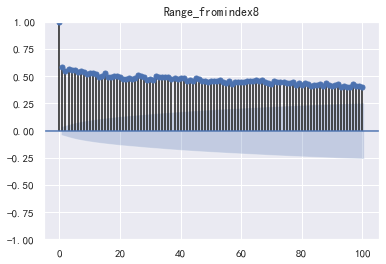

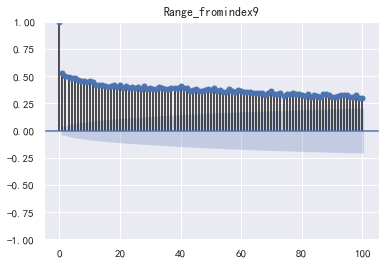

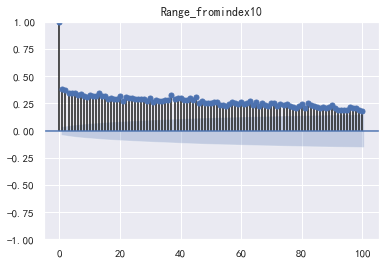

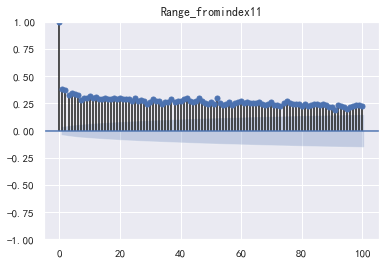

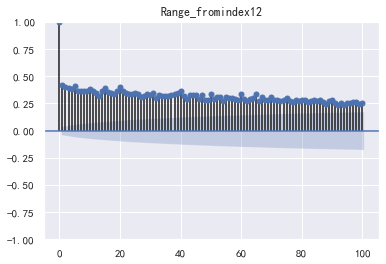

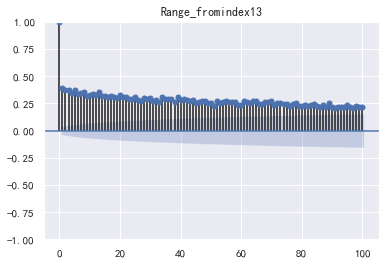

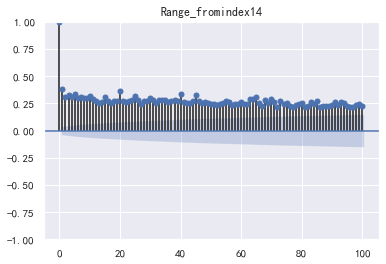

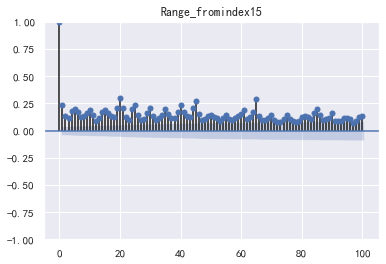

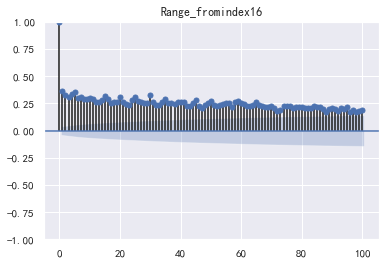

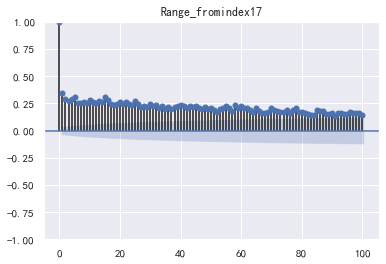

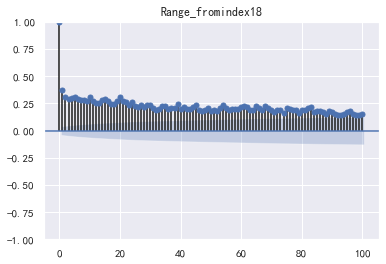

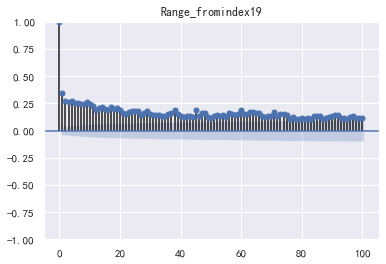

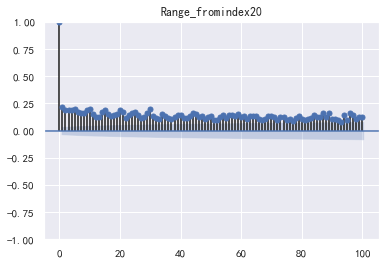

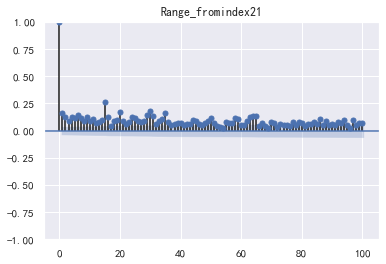

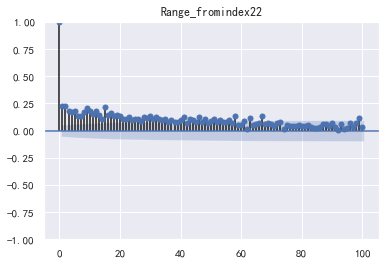

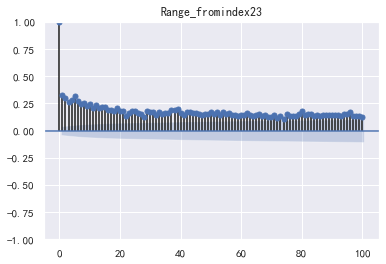

In [6]:
# ---以指定时间框的时间段位置进行数据切片。
boxtimeframe = "TIMEFRAME_D1"
data_box = myMT5Pro.getsymboldata(symbol, boxtimeframe, date_from, date_to, index_time=True, col_capitalize=True)

for fromindex in range(24):
    data_choose = myMT5Pro.slice_by_timeshift(data_total, data_box.index, fromindex=fromindex, limitedcount=1)
    data_vola = data_choose["Range"]
    myDA.tsa.tsa_acf(data_vola, nlags=100, plot=True, plottitle="Range_fromindex%s"%fromindex)


